# Linear Regression Implementation 

Before knowing what is linear regression, let us get ourselves accustomed to regression. Regression is a method of modelling a target value based on independent predictors. This method is mostly used for forecasting and finding out cause and effect relationship between variables. Regression techniques mostly differ based on the number of independent variables and the type of relationship between the independent and dependent variables.

Simple linear regression is a type of regression analysis where the number of independent variables is one and there is a linear relationship between the independent(x) and dependent(y) variable. For example, univariate Linear reg.

##### life_satisfaction = θ0 + θ1 × GDP_per_capita. 
This model is just a linear function of the input feature GDP_per_capita. θ0 and θ1 are the model’s parameters.
A linear model makes a prediction by simply computing a weighted sum of the input features, plus a constant called the bias term (also called the intercept term). 
The motive of the linear regression algorithm is to find the best values for θ0 + θ1.


multivariateLinear reg
##### y = θ0 + θ1X + θ2X2 + θ3X3 .....+ θnXn 


- ŷ is the predicted value.

- n is the number of features.

- xi is the ith feature value.

- θj is the jth model parameter (including the bias term θ0 and the feature weights θ1, θ2, ⋯, θn).



#### In a vectorized Form
#### ŷ =hθ(x)= θ*X 
In this equation:

- θ is the model’s parameter vector, containing the bias term θ0 and the feature weights θ1 to θn.

- x is the instance’s feature vector, containing x0 to xn, with x0 always equal to 1.

- θ · x is the dot product of the vectors θ and x, which is of course equal to θ0x0 + θ1x1 + θ2x2 + ... + θnxn.

- hθ is the hypothesis function, using the model parameters θ.



## NOTE 
If θ and x are column vectors, then the prediction is ŷ = 𝛉T*X 
,where 𝛉T is the transpose of θ (a row vector instead of a column vector) and 𝛉T*X
 is the matrix multiplication of 𝛉 and x. 

### Cost Function 
The cost function helps us to figure out the best possible values for θ0 and θ1 which would provide the best fit line for the data points. Since we want the best values for θ0 and θ1, we convert this search problem into a minimization problem where we would like to minimize the error between the predicted value and the actual value.

### 𝐽(𝜃0,𝜃1)=1/2𝑚∑ (𝜃T*(𝑥(𝑖))−𝑦(𝑖))2

The difference between the predicted values and ground truth measures the error difference. We square the error difference and sum over all data points and divide that value by the total number of data points. This provides the average squared error over all the data points. Therefore, this cost function is also known as the Mean Squared Error(MSE) function. Now, using this MSE function we are going to change the values of θ0 and θ1 such that the MSE value settles at the minima.


#### Two ways of Training a Linear Regression Model 

1. Using a direct “closed-form” equation that directly computes the model parameters that best fit the model to the training set (i.e., the model parameters that minimize the cost function over the training set).

2. Using an iterative optimization approach called Gradient Descent (GD) that gradually tweaks the model parameters to minimize the cost function over the training set, eventually converging to the same set of parameters as the first method. 

a) Batch GD

b) Mini-batch GD

c) Stochastic GD.

### 1. The Normal Equation
To find the value of θ that minimizes the cost function, there is a closed-form solution—in other words, a mathematical equation that gives the result directly.

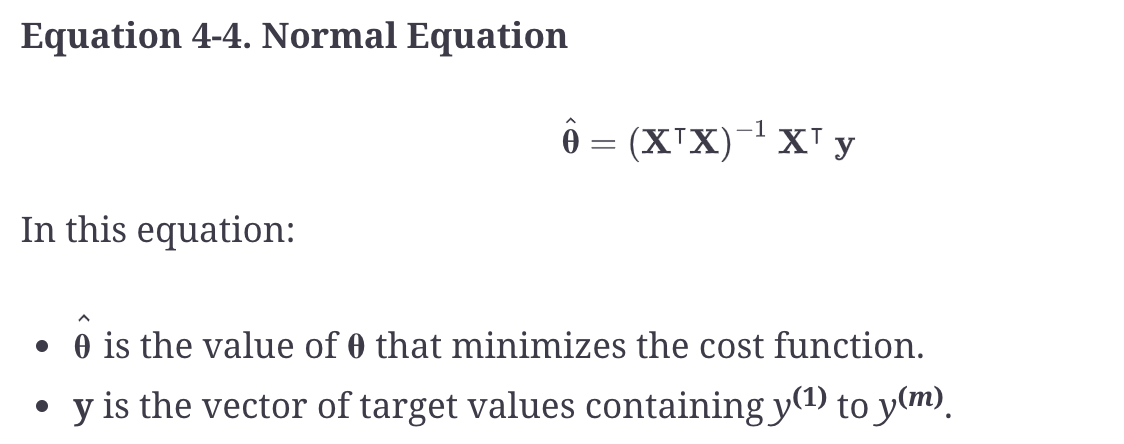

In [48]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [239]:


def lin_closed(X_train,y_train):
    
    # n - number of features , m - training points
    m = X_train.shape[0]
    
    if len(X_train.shape) == 1: # If dim=1 
        n = 1
    else:
        n = X_train.shape[1]

    
    X = np.c_[np.ones((m,1)),X_train] # add x0 = 1 to each instance 
    y = y_train.reshape((m,1))
    w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    
    return w

In [288]:
X = np.array([0,2,3])
y = np.array([1,1,4])

lin_closed(X,y)

array([[0.57142857],
       [0.85714286]])

### NOTE:
#### θ = inv(X.T.dot(X)).dot(XT).dot(y)
Our aim is to get (n+1,) dimension parameters. where n is number of features or variables. So make the dot product suitable we have to add 1's to every data point because X0's are are always one to give you the bias term. 
#### X = np.c_[np.ones((m,1)),X]
Then the dimension of the features will be (m,n+1) in this case (3, 2) then 
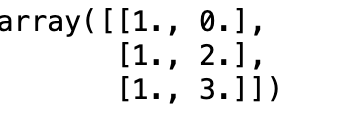
       
#### X.T.dot(X) 
gives us (n+1, n+1) dimension and we compute the inverse of this matrix. 

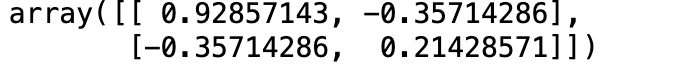
 #### v = inverse.dot(X.T) 
 
 ##### array([[ 0.92857143,  0.21428571, -0.14285714],
 ####        [-0.35714286,  0.07142857,  0.28571429]])
 This will give a (n+1,m) matrix(2,3),  Then compute the dot product of the result(2,3) with y values(3,1) to get the parameters 
##### w = v.dot(y)  
and the shape of the parameters will be (n+1,) in this case (2,) where n is number of features the +1 is basically the bias. 
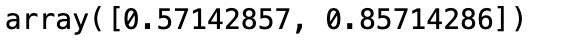

## Gradient Descent

The general idea of Gradient Descent is to tweak parameters iteratively in order to minimize a cost function. Gradient descent is a method of updating θ0 and θ1 to reduce the cost function(MSE). The idea is that we start with some values for θ0 and θ1 and then we change these values iteratively to reduce the cost. Gradient descent helps us on how to change the values.

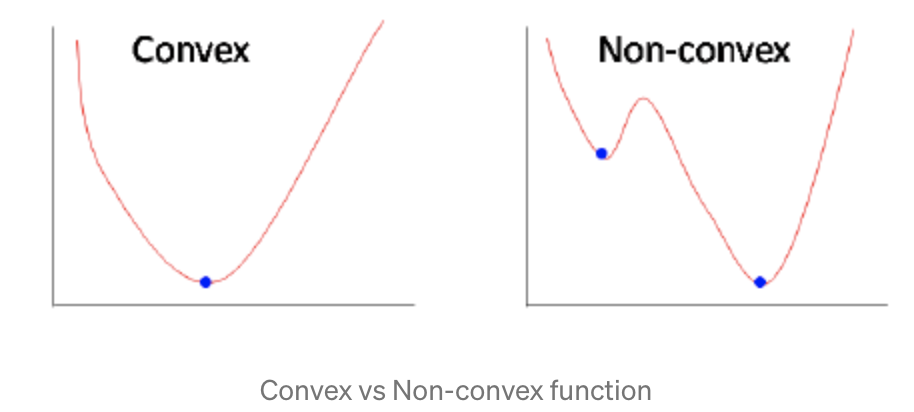

An important parameter in Gradient Descent is the size of the steps, determined by the learning rate hyperparameter. If the learning rate is too small, then the algorithm will have to go through many iterations to converge, which will take a long time.

On the other hand, if the learning rate is too high, you might jump across the valley and end up on the other side, possibly even higher up than you were before. This might make the algorithm diverge, with larger and larger values, failing to find a good solution

Fortunately, the MSE cost function for a Linear Regression model happens to be a convex function, which means that if you pick any two points on the curve, the line segment joining them never crosses the curve. This implies that there are no local minima, just one global minimum(always convex)

The Algorithm for GD:

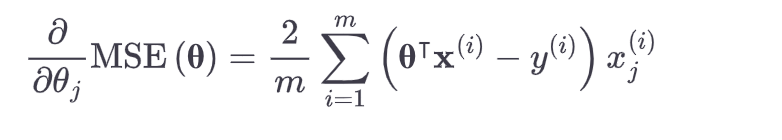


## Three Types of Gradient Descent Algorithms 
- Batch Gradient Descent
- Stochastic Gradient Descent
- Mini-batch Gradient Descent

#### Batch Gradient Descent
It is the first basic type of gradient descent in which we use the complete dataset available to compute the gradient of cost function. 
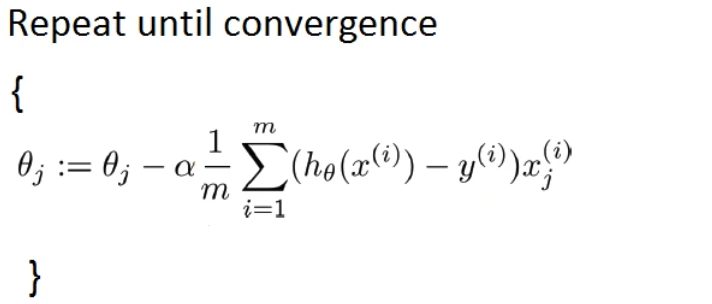
It uses the whole batch of training data at every step (actually, Full Gradient Descent would probably be a better name). As a result it is terribly slow on very large training sets. However, Gradient Descent scales well with the number of features. 

### Lets see a simple implementation with one feature

In [252]:
def lin_GD_one(X_train,y_train): # one feature
    
    # initialize w and b to zero
    w = b = 0
    m = X.shape[0] # m is the number of training points
    lr = 0.01 # learning rate or size of steps
    iteration = 1000
    print("Bias        Weight      loss")
#     y_hat = w*X_train + b
#     print('Y 88888', y_hat)
    # Iterate through all training points 
    for i in range(iteration):
        y_hat = w*X_train + b # compute the prediction for all the points at each iteration 
        Error = y_train - y_hat # compute the Error between the True value and the predicted value, 
                                
        loss = (1/m)* sum([val**2 for val in Error])  # compute the loss, average of squared Errors,our aim is to minimize the Loss 
        
        dw = (-2/m)*sum(X_train*(y_train - y_hat)) # partial derivative of cost w.r.t w
        db = (-2/m)*sum(y_train - y_hat)
        
        w = w - lr*dw
        b = b - lr*db
        
    print(f"{round(b,8)}  {round(w,8)}  {round(loss,8)}")

In [253]:
lin_GD_one(X,y)

Bias        Weight      loss
0.57105826  0.85729625  0.85714291


#### For multiple variables 

In [262]:
# Batch Gradient Descent uses the whole training set
# to compute gradients at every step which makes it
# slow when the training set is large.
def lin_Batch_GD(X_train,y_train):
    
    lr = 0.04
    iteration = 1000

    m = X_train.shape[0]
    
    if len(X_train.shape) == 1: # If dim-1
        n = 1
    else:
        n = X_train.shape[1]

    X = np.c_[np.ones((m,1)),X_train]
    y = y_train.reshape((m,1))
    
    # initialize w = 0
    w = np.zeros((n+1,1))
    for i in range(iteration):
        dw = (2/m) * (X.T).dot((X.dot(w))-y)
        w = w - lr*dw
        
    return w

In [264]:
lin_Batch_GD(X,y)

array([[0.57142857],
       [0.85714286]])

# stochastic gradient descent

The first step of algorithm is to randomize the whole training set. Then, for updation of every parameter we use only one training example in every iteration to compute the gradient of cost function. As it uses one training example in every iteration this algo is faster for larger data set. In SGD, one might not achieve accuracy, but the computation of results are faster.


- In the inner loop:
- Taking first step: pick first training example and update the parameter using this example, then for second example and so on
- Taking second step: pick second training example and update the parameter using this example, and so on for ‘ m ‘.
- Now take third … n steps in algorithm.
- Until we reach global minimum.


In [293]:
# Stochastic GD picks a random instance in the training set at every step 
# and computes the gradients based only on that single instance.

def lin_Stochastic_GD(X_train,y_train):
    
    lr = 0.04
    epochs = 300

    
    if len(X_train.shape) == 1: # If dim-1
        n = 1
    else:
        n = X_train.shape[1]
    
    m = X_train.shape[0]

    X = np.c_[np.ones((m,1)),X_train]
    y = y_train.reshape((m,1))
    
    # initialize w = 0
    w = np.zeros((n+1,1)) # np.random.randn((n+1,1))
    
    
    for epoch in range(epochs):
        for i in range(m):
            random_index = np.random.randint(m)
            Xi = X[random_index:random_index+1]
#             print(Xi.shape)
            yi = y[random_index:random_index+1]
            
            dw = (2) * (Xi.T).dot((Xi.dot(w))-yi) # m = 1, 
            w = w - lr*dw
        
    return w

In [294]:
lin_Stochastic_GD(X,y)

array([[0.90819016],
       [1.02445898]])

# Mini-batch Gradient Descent

Mini batch algorithm is the most favorable and widely used algorithm that makes precise and faster results using a batch of ‘ m ‘  training examples. In mini batch algorithm rather than using  the complete data set, in every iteration we use a set of ‘m’ training examples called batch to compute the gradient of the cost function. Common mini-batch sizes range between 50 and 256, but can vary for different applications.
In this way, algorithm reduces the variance of the parameter updates, which can lead to more stable convergence.
At each step, instead of computing the gradients based on the full training set (as in Batch GD) or based on just one instance (as in Stochastic GD), Mini-batch GD computes the gradients on small random sets of instances called mini-batches. 

In [316]:
# Mini-Batch instead of computing the gradients 
# based on the full training set (as in Batch) or based on just one instance (as in Stochastic GD),
# Mini-Batch GD computes the gradients on a small random sets of instances called mini-batches.

def lin_Mini_Batch_GD(X_train,y_train):
    
    lr = 0.04
    epochs = 100
    bs = 20

    
    if len(X_train.shape) == 1: # If dim-1
        n = 1
    else:
        n = X_train.shape[1]
    
    m = X_train.shape[0]

    X = np.c_[np.ones((m,1)),X_train]
    y = y_train.reshape((m,1))
    
    # initialize w = 0
    w = np.zeros((n+1,1)) # np.random.randn((n+1,1))
    
    print(m/bs)
    for epoch in range(epochs):
        for i in range((m-1)//bs +1): # bs is batch size
            
            start_index = i * bs
            end_index = start_index + bs
            
            X_bs = X[start_index:end_index]
            y_bs = y[start_index:end_index]
            
            dw = (2/len(X_bs)) * (X_bs.T).dot((X_bs.dot(w))-y_bs) 
            w = w - lr*dw
        
    return w

In [317]:
lin_Mini_Batch_GD(X,y)

5.0


array([[ 3.69376774],
       [59.20912764],
       [ 6.67441324]])

## Implementation 

First generate linear data 

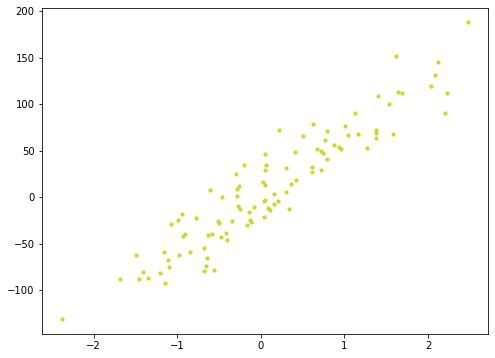

In [355]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets


X, y = datasets.make_regression(n_samples=100, n_features=2, noise=20, random_state=4)


cmap = plt.get_cmap("viridis")
fig = plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], y, color=cmap(0.9), s=10)
plt.show()


In [356]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1234
)

In [357]:
X_train.shape

(80, 2)

In [413]:
class LinearRegression:
    def __init__(self, lr=0.01,  num_iter=1000):
        self.lr = lr
        self.num_iter = num_iter
        self.w = None
        
    def fit(self, X_train, y_train):
        lr = 0.04
        epochs = 100
        bs = 20

        if len(X_train.shape) == 1: # If dim-1
            n = 1
        else:
            n = X_train.shape[1]

        m = X_train.shape[0]
        
        X = np.c_[np.ones((m,1)),X_train]
        y = y_train.reshape((m,1))
        
        self.w = np.zeros((n+1,1))
        for _ in range(epochs):
            for i in range((m-1)//bs +1):
                start_index = i * bs
                end_index = start_index + bs
                self.X_bs = X[start_index:end_index]
                self.y_bs = y[start_index:end_index]
                
                dw = (2/len(self.X_bs)) * (self.X_bs.T).dot((self.X_bs.dot(self.w))-self.y_bs) 
#                 print(X.shape), 
                self.w -= self.lr * dw 

    def predict(self, X):
        y_pred = np.dot(self.X_bs, self.w)
        return y_pred

In [414]:
def mean_squared_error(y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)


In [418]:
regressor = LinearRegression(lr=0.0001, num_iter=1000)
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)


In [419]:
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

MSE: 5238.012174214411


MSE: 305.7719958301902
Accuracy: 0.9253717934621964


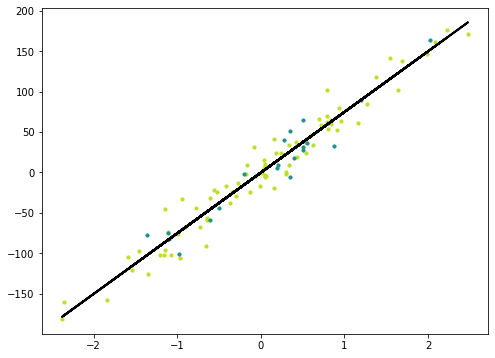

In [420]:
import numpy as np


def r2_score(y_true, y_pred):
    corr_matrix = np.corrcoef(y_true, y_pred)
    corr = corr_matrix[0, 1]
    return corr ** 2


class LinearRegression:
    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # gradient descent
        for _ in range(self.n_iters):
            y_predicted = np.dot(X, self.weights) + self.bias
            # compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        y_approximated = np.dot(X, self.weights) + self.bias
        return y_approximated


# Testing
if __name__ == "__main__":
    # Imports
    import matplotlib.pyplot as plt
    from sklearn.model_selection import train_test_split
    from sklearn import datasets

    def mean_squared_error(y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

    X, y = datasets.make_regression(
        n_samples=100, n_features=1, noise=20, random_state=4
    )

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=1234
    )

    regressor = LinearRegression(learning_rate=0.01, n_iters=1000)
    regressor.fit(X_train, y_train)
    predictions = regressor.predict(X_test)

    mse = mean_squared_error(y_test, predictions)
    print("MSE:", mse)

    accu = r2_score(y_test, predictions)
    print("Accuracy:", accu)

    y_pred_line = regressor.predict(X)
    cmap = plt.get_cmap("viridis")
    fig = plt.figure(figsize=(8, 6))
    m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
    m2 = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
    plt.plot(X, y_pred_line, color="black", linewidth=2, label="Prediction")
    plt.show()